# A Glance at American Cookbooks, 1820-1920

##### By Yan Chen and Elizabeth Esser


### Goal:
Our goal in this project was to see if we could find changes in the American diet through trends over the last 200 or so years.

### Questions:
1. Has the amount of sugar and oil in recipes increased over time?
2. Have cookbooks included more ingredients and dishes over time?

### Hypotheses:
1. We predicted that the amounts of sugar and oil would be found to increase over time. 
2. We predicted an increase in both ingredients and dishes over time.

### Challenge:
This project was a challenge to ourselves to find out if we would be able to get the data into a useable form. Each cookbook from the Historic American Cookbook Dataset is in a different text format. Additionally, many of the cookbooks contained large amounts of text which were stories or other information, not recipes. 

### Method:
* In the end, we only used those cookbooks in the dataset which had the recipe names in all capital letters, as this allowed our functions to easily distinguish between recipes.
* However, there were other lines of text in all capital letters which were not recipes, and therefore we did not want to misleadingly include them in our final data. To account for this, we manually went through a couple of the files to find the most common all capital words and phrases. Those comprise the list named keywords, and are excluded from our recipe data.

#### The list of lists called name_data contains each of the cookbook files to be used and their publication year. 
* This list was compiled by manually looking at each text file to determine whether or not it had each recipe name on its own line in all capital letters. 
* The year was found by manually looking at the copyright and publication information at the beginning of each file.
* The files had the publishing information, including year, in all different formats, and therefore it would have been extremely difficult to find by writing a program.
* It would have been further complicated by the fact that the vast majority of files contained multiple years: not only the original year, but also the year that the file was digitized into the Historic American Cookbook Dataset, and 1923 as the year it was older than so that it is now in the public domain (which allows us to use the data freely).

### Modules used:
1. statistics - included in Python 3
2. pyplot from matplotlib - included in Anaconda
3. LinearRegression from sklearn.linear_model - included in Python 3

### Ethics Implications:
Our data is primarily from over 100 years ago and only about cookbooks. See the Limitations of this Study towards the end. Because our data is not related to current people or events and it is so limited, we do not think that there are any ethical implications that we need to be concerned about.

In our proposal, we were concerned about ethical implications relating to the possibility of a certain type of food having a strong change correlating to a particular ethnic group or change in immigration patterns. We did find a small increase in the use of pepper over time. While this could be attributed to influence from increased trading and cross-cultural influence, that would be the subject of a future study. No causal conclusions can be reasonably drawn from our study.

### Overview of Results

An initial look at the visualizations indicates that there have been no dramatic changes over time.

Based on the Number of Dishes plot, there may not be any strong correlation between number of cookbooks in a recipe and when it was published.

*The most striking finding is that usage of chicken has strongly increased over time.*

*The main result of this study is many more questions to be explored in future studies.*

# Cleaning and Preparing the Data

In [1]:
puctuation=":;>.<,?/|\}]{[)(*&^%$#@!+_=-`~ "
data={'a':1,'one':1,'two':2,'three':3,'four':4,'1':1,'2':2,'3':3,'4':4,'one-half':0.5,'half':0.5}
# to evaluate the consumption 
keywords=["HINTS",'REMARKS',"INDEX","MANUAL","CONTENTS",'PART','...............','--------','TABLE','PREFACE','PAGE','ARTICLES','MTTO',
         'FAREWELL','TO THE READER','GENERAL PRICIPLES OF COOKING','HOUSEKEEPING','KITCHEN FURNISHING','KITCHEN HOLDERS','HOUSEHOLD',
         'MANAGEMENT','STOCKINGS','BOX','LABEL CHILDREN','TO PUT OUT','SHEETS','HOW TO CLEAR A TABLE','MATTRESSES',
         'COVERS','DUSTERS','PAPER AND STRING','MENDING','RAINY DAYS','PACKING AWAY','CLEAN','CLOTHES','WAIT TIL ARTICLES','OUTSIDE GARMENTS WHEN YOUR',
          'NEVER ALLOW CHILDREN','RISE EARLY','TAKE CARE OF THE FOOD','HAVE EVERYTHING CLEAN','ALLOW NO HOLES','MAKE A POINT',
          'THE FEWER SERVANTS THE BETTER','IF IT IS POSSIBLE','BEFORE SWEEPING','WEAR PRETTY MORNING DRESSES','ALWAYS HAVE YOUR TABLE',
          'IF CHILDREN WANT ANYTHING','RULES FOR EATING','THE USE OF FUEL','GRATE FIRES','KITCHEN RANGES','PARLOR HEATERS',
          'SPRING FUEL','PRACTICE','INTRODUCTORY','PHILOSOPHY','COOKERY','WHAT WE EAT','GOING TO MARKET','FIGURE OF A CHOICE ANIMAL',
          'DEAR GIRLS','PEOPLE','HOUSEKEEPER','BOOK','CHAPTER','AUNT SARAH','HOUSE','THE OLD MILL','RALPH JACKSON','ROCK VALLEY',
          'PROFESSOR ','SCHMIDT','HIM','OLD RAG CARPET','RUG','IMITATION OF A NAVAJO BLANKET','IF I CAN LIVE','PALASADES OR NARROWS OF NOCKAMIXON',
          'THE NARROWS','TOP ROCK','RINGING ROCKS','HIGH FALLS','BIG ROCK','DOUGHNUTTING TIME','SGRAFFITO','CUPBOARD','THE POTTER',
          'BIRTH AND CHRISTENING','CERTIFICATE','OLD STORE','CATCHING ELBADRITCHELS','POTATO PRETZEL','FAITHFUL OVER A FEW THINGS',
          'THE CHANGED CROSS','CHURCH BUILDING','DURHAM CAVE','WOODLAND STREAM','COPYRIGHT','FUNCTION OF','DIGESTIBILITY',
          'INDIGESTION','COOK BOOK','CHEMISTRY OF FOOD','OCLC','COPYRIGHTED','EDITION','FOR THE BENEFIT OF','SETTLEMENT',
          'BOOKS','BE IT REMEMBERED','DISTRICT OF','DEDICATION','IN MEMORY OF',]
#test for illegal keys (titles)
keywords_2=['-----------','__________','======','..........','http://','January']
# test for illegal values (instructions)
name_data=[['army.txt',1896],
['aunt.txt', 1889],
['beec.txt', 1846],
['blue.txt', 1904],
['bost.txt', 1896],
['brkf.txt', 1875],
['buck.txt', 1877],
['cclu.txt', 1904],
['chas.txt', 1864],
['chin.txt', 1914],
['choc.txt', 1909],
['comm.txt', 1873],
['coow.txt', 1832],
['creo.txt', 1885],
['dcvb.txt', 1840],
['epia.txt', 1894],
['epib.txt', 1894],
['fran.txt', 1893],
['frch.txt', 1830],
['gohk.txt', 1839],
['grea.txt', 1857],
['gtte.txt', 1911],
['ital.txt', 1919],
['jenn.txt', 1866],
['jewi.txt', 1918],
['lady.txt', 1846],
['matf.txt', 1915],
['oldv.txt', 1878],
['orie.txt', 1913],
['pcdg.txt', 1876],
['pres.txt', 1873],
['rore.txt', 1902],
['sauc.txt', 1902],
['sett.txt', 1901],
['sevf.txt', 1832],
['time.txt', 1905],
['virg.txt', 1838]]

ingredient_default_measures={'salt':1/92,'sugar':2/92,'pepper':1/180,'oil':3/92}

The change_format function turns all letters to lower case and removes the puctuation and spaces in a word.

In [2]:
def change_format(word):
    new=[letter for letter in str(word).lower() if letter not in puctuation]
    return ''.join(new)

The is_number fuction tells us whether or not the input is a number.
* Input: A string
* Output: True or False
    - True means this string is a number

In [3]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

The test_title function searches for all titles containing illegal parts, and then tells us whether or not the input is a name of a dish.
* Input: A list of words with all capital letters, numbers, and puctuation
* Output: True or False
    - True means this title is very likely to be a title of a dish

In [4]:
def test_title(cap_list):
    is_head=False
    for word in cap_list:
        if is_number(word) == False:
            is_head=True         # if this line is not all numbers.  (example: 62.  83)
            if word.upper()==word:  # if there is a capitalized word in this line, we consider this line a title
                is_head=True
        for q in keywords:
            if q in ''.join(cap_list):
                is_head=False    # test if it is a title for a dish 
    return is_head

How_much function counts the total consumption of specific ingredient.
#### Input:
* string - Instructions of cooking this dish. All lower cases, no puctuations and words are seperated by ' ' (a standard space character)
* ingredient - A string. A certain ingredient we are looking for, such as 'salt'.
#### Output:
* Total measure. We chose to standardize everything to the unit of a pound.
#### Method:
* Each ingredient is counted only once per dish.
- First, we go through each word in the string. If it is the ingredient we are looking for, we grab the several words before and after this word, and form a list called 'want'. If this word appears at the beginning or end of the whole instruction, we only grab words after or before it, as applicable.
- Then, we check each word in the 'want' list. If it is word like 'pound','ounce' or 'teaspoonful', we turn it to equivalent pound measurement and check all words before it to see the exact measurement. 
- If there are no words in the instruction showing the exact measurement, we take the default value in the dictionary called ingredient_default_measures. All values in ingredient_default_measures are fairly common measurements.

In [5]:
def how_much(string,seasoning):
    a_list=string.split(' ')
    output=0   #output is the consumption
    for x in range(len(a_list)):
        # first, we need to include the case that the seasoning we found is at the beginning/end of a sentence.
        if a_list[x]==seasoning:
            if x>=4 and (x+1)<=len(a_list):
                want= a_list[x-4:x+1]
            elif x<4:
                want = a_list[:x+1]
            elif x>=4:
                want = a_list[x-4:]    # we get several words before and after the keyword 
            if len(want)>3:
                if want[-2] == "pound" or want[-2]== 'pounds' :   # example: 4 pounds sugar
                    for number in want[:-2]:
                        if number in data.keys() :
                            output =data[change_format(number)]
                            return output
                        elif number == "quater"  :
                            output =0.25
                            return output
                        elif number == "quaters":
                            for w in want[:want.index('quaters')]:
                                if w in data.keys()  :
                                    output = data[w]/4
                                    return output
            for word in want:
                if word == 'ounce' or word =='ounces' :    
                    for number in want:
                        if number in data.keys() :
                            output =data[number]*0.0625
                            return output
                        elif number == "quater"  :
                            output +=0.25*0.0625
                            return output
                        elif number == "quaters":
                            for w in want[:want.index('quaters')]:
                                if w in data.keys()  :
                                    output = data[w]*0.25*0.0625
                                    return output
                if word == "teaspoonful"  :
                    for number in want[:want.index(word)+1]:
                        if change_format(number) in data.keys()  :
                            output=data[change_format(number)]/92
                            return output
                    return 1/92
                elif change_format(word) == "teaspoonfuls"  :
                    for number in want[:want.index(word)+1]:
                        if change_format(number) in data.keys() :
                            output = data[change_format(number)]/32
                            return output
                if word == "tablespoonful"  :
                    for number in want[:want.index(word)+1]:
                        if change_format(number) in data.keys()  :
                            output=data[change_format(number)]/32
                            return output
                elif change_format(word) == "tablespoonfuls":
                    for number in want[:want.index(word)+1]:
                        if change_format(number) in data.keys() :
                            output = data[change_format(number)]/32
                            return output
        output = ingredient_default_measures[seasoning]
    return output

The form_dictionary function works to create a dictionay containing all information we need from the cookbook. 
#### Method
* We go through each line in the text tile. 
    - After spending much time looking through differnt cookbooks, we found that many of them show the titles of dishes in all capital letters. 
* Therefore, we find lines with all capital letters, which are supposed to be the names of dishes. 
* We use the test_title function to see if each title is legal for a dish name. 
    - We also go through each word in the instructions and look for illegal parts.
* After recognizing the actual dishes, we form our dictionary.

#### Input:
* Filepath - name of the cookbook.
#### Output:
* A dictionary. 
    - Except for 'cookbook_name' and 'number_of_total_dishes', all keys should be names of dishes and the correponding values are the instructions for cooking.
    
{'cookbook_name' : the name of the text file,

'number_of_total_dishes' : how many dishes are recognized by our function from this cookbook

dish name : ways to cook this dish}

In [6]:
def form_dictionary(cookbook_name):
    with open (cookbook_name,'r') as f:
        year = 1
        line = f.readline()
        dic={}
        for dish in range(0,30000):
            mylist=[]     # list of instructions
            while line[:7].upper() != line[:7] or line == '\n':
                line = f.readline()
            capline = line.strip().split(' ')  # list of possible title lines (capital)
            count=0
            head=[] # list of possible title
            while count< len(capline) and capline[count].upper() == capline[count]:
                #in case that instructions are in the same line as the title
                if capline[count]=='':
                    capline.pop(count)
                    count=count-1
                else:
                    head.append(change_format(capline[count]))
                count+=1
            if test_title(capline[:count]):   #test if it is a title
                mylist.append(capline[count:])
                header = ' '.join(head) # string version of title
                line = f.readline()
                while line[:7].upper() != line[:7] or line == '\n':
                    if line != '\n':
                        mylist.append(line.strip())
                    line=f.readline()
                is_dish = True
                if  mylist!=[[]] and mylist[1:]!=[]:
                    new_list=[change_format(word) for word in mylist[0]]
                    for string in mylist[1:]:
                        for q in keywords_2:
                            if q in string:
                                is_dish =False
                        p=[change_format(word) for word in string.split()]
                        for item in p:
                            if item != '':
                                new_list.append(item)
                    if is_dish == True:
                        intro=' '.join(new_list)
                        dic[header]=intro
            else:
                line=f.readline()
        for k in dic.keys():
            if is_number(dic[k]):
                dic.pop(k)
        dic['cookbook_name']=cookbook_name
        total_dishes = len(dic)-1
        dic['number_of_total_dishes']=str(total_dishes)
    return dic

The following code cell forms a dictionary showing the frequency of appearance of an ingredient, and its measures.
* All cookbook names and the year they were written in come from the given dictionary name_data.
* All ingredients come from the dictionary material_data.
* We create a dictionary containing following information:
    - Name of the cookbook it comes from
    - Measurement of each ingredient
    - Frequency of the appearance of each ingredient

In [7]:
# you look for more ingredients by adding them here 
    # and in the ingredient_default_measures dictionary with a default amount
material_data=['sugar','salt','pepper', 'oil']

final_output={'Year':[],'Total_dishes':[]}

for b in material_data:
        final_output['consumption of {}'.format(b)]=[]
        final_output['percentate of dish with {}'.format(b)]=[]
    

for cookbook_name in name_data:
    dic={}
    dictionary = form_dictionary(cookbook_name[0])
    final_output['Year'].append(cookbook_name[1])
    final_output['Total_dishes'].append(int(dictionary['number_of_total_dishes']))
    for b in material_data:
        consumption = 0
        dish_with = 0
        for key in dictionary.keys():
            if b in dictionary[key]:
                dish_with +=1
                consumption += how_much(dictionary[key],b)
        dic['dish contains {}'.format(b)]=str(dish_with)+"/"+dictionary['number_of_total_dishes']
        dic['consumption of {}'.format(b)]=consumption
        dic['name']=cookbook_name[0]
        final_output['consumption of {}'.format(b)].append(consumption)
        final_output['percentate of dish with {}'.format(b)].append(100*dish_with/int(dictionary['number_of_total_dishes']))
    print(dic)
    print('\n')
print(final_output)



{'dish contains sugar': '26/161', 'consumption of sugar': 10.372282608695654, 'name': 'army.txt', 'dish contains salt': '87/161', 'consumption of salt': 9.786684782608674, 'dish contains pepper': '58/161', 'consumption of pepper': 0.6948973429951686, 'dish contains oil': '70/161', 'consumption of oil': 2.3437499999999973}


{'dish contains sugar': '500/836', 'consumption of sugar': 13.42934782608705, 'name': 'aunt.txt', 'dish contains salt': '345/836', 'consumption of salt': 4.562499999999986, 'dish contains pepper': '160/836', 'consumption of pepper': 1.0392210144927516, 'dish contains oil': '433/836', 'consumption of oil': 14.103260869565187}


{'dish contains sugar': '1/4', 'consumption of sugar': 0.021739130434782608, 'name': 'beec.txt', 'dish contains salt': '2/4', 'consumption of salt': 0.021739130434782608, 'dish contains pepper': '0/4', 'consumption of pepper': 0, 'dish contains oil': '3/4', 'consumption of oil': 0.09782608695652173}


{'dish contains sugar': '117/472', 'consum

{'dish contains sugar': '33/90', 'consumption of sugar': 0.7486413043478258, 'name': 'matf.txt', 'dish contains salt': '36/90', 'consumption of salt': 0.39130434782608675, 'dish contains pepper': '15/90', 'consumption of pepper': 0.09396135265700481, 'dish contains oil': '36/90', 'consumption of oil': 1.1739130434782608}


{'dish contains sugar': '19/38', 'consumption of sugar': 1.4714673913043483, 'name': 'oldv.txt', 'dish contains salt': '13/38', 'consumption of salt': 1.130434782608696, 'dish contains pepper': '11/38', 'consumption of pepper': 0.08680555555555555, 'dish contains oil': '16/38', 'consumption of oil': 0.7391304347826085}


{'dish contains sugar': '4/43', 'consumption of sugar': 0.08695652173913043, 'name': 'orie.txt', 'dish contains salt': '11/43', 'consumption of salt': 0.11956521739130432, 'dish contains pepper': '13/43', 'consumption of pepper': 0.07222222222222222, 'dish contains oil': '21/43', 'consumption of oil': 0.6847826086956522}


{'dish contains sugar': '19

# Visualization:

In [8]:
import matplotlib.pyplot as plt

## 1. Histgrams of the Amount of an Ingredient 

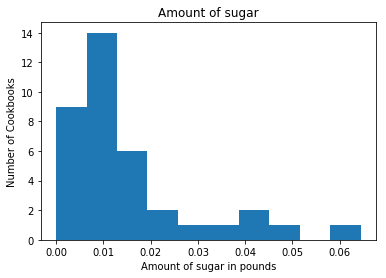

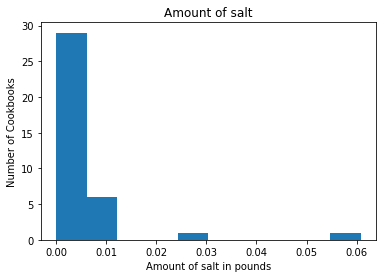

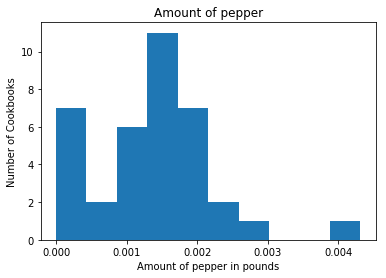

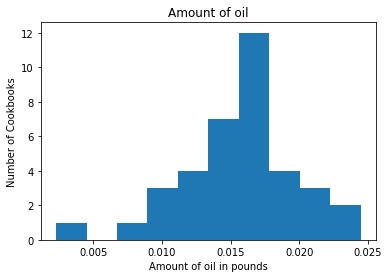

In [24]:
for b in material_data:
    y_value=[]
    for i in range(len(final_output['Total_dishes'])):
        y_value.append(final_output['consumption of {}'.format(b)][i]/final_output['Total_dishes'][i])
    plt.hist(y_value)
    plt.title('Average amount of {} in a cookbook'.format(b))
    plt.ylabel('Number of Cookbooks')
    plt.xlabel('Amount of {} in pounds'.format(b))
    plt.show()


The above histograms show the number of cookbooks with an average amount of an ingredient.

* Compared to the other ingredients, the amount of sugar appears fairly high. However, this might be explained by the inclusion of cookbooks with many dessert recipes in them.
* Interestingly, the vast majority of cookbooks included less than 0.01 pounds of sugar.
* While the amount of pepper spikes between 0.001 and 0.002, those are really small amounts, indicating that about half of the cookbooks called for a very small amount of pepper.
* The amount of oil recommended by the cookbooks spikes at just over 0.015 pounds, indicating that oil is more often called for than either oil or pepper.

In [10]:
from sklearn.linear_model import LinearRegression

## 2. plot 

   x-axies:year
   
   y-axies: the percentage of dishes containing sugar

explaination here about what we find from these plots..... is this related to immigration? Can we referred to some acdemic statistics online(features of diets from different countries)?

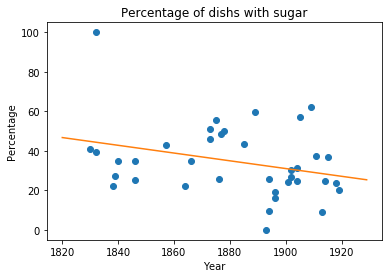

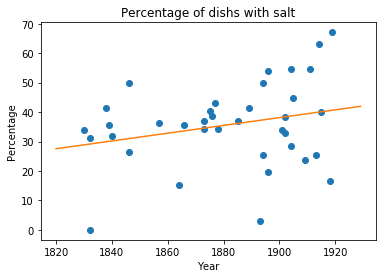

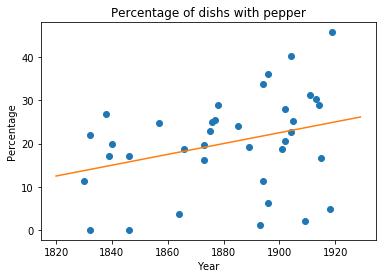

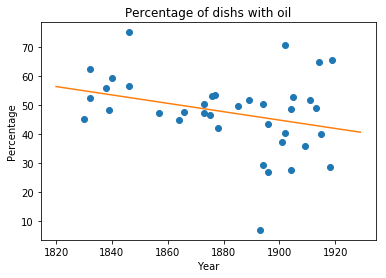

In [11]:
for b in material_data:
    plt.plot(final_output['Year'],final_output['percentate of dish with {}'.format(b)],'o')
    plt.title('Percentage of dishs with {}'.format(b))
    plt.ylabel('Percentage')
    plt.xlabel('Year')
    
    model_x_values=[[x] for x in final_output['Year']]
    fit = LinearRegression().fit(model_x_values, final_output['percentate of dish with {}'.format(b)])
    all_positions=[x for x in range(1820,1930)]
    predicted_times = fit.predict([[x] for x in all_positions])
    plt.plot(all_positions,predicted_times)
    plt.show()

Sugar:
* At first glance, it appears from the trendline that use of sugar has decreased over time.
* However, there appears to be one outlier in which 100% of the recipes include sugar. 
* This is most likely a dessert cookbook.
* Ignoring the outlier, it is hard to tell which direction the trendline would point in.
* It would definitely be close to steady, with very little change.
* However, it may still be sloping downwards, or even possibly upwards.

Salt:
* The trendline and distribution of points indicate that salt usage has been steadily increasing over time.

Pepper:
* The usage of pepper appears to be increasing over time.
* This could be due to increased trade and cross-cultral influences.
* For example, Aisan food and Mexican food may have influenced the usage of more pepper.
* However, this is mere speculation, and cannot be answered within the scope of this study.

Oil:
* The number of dishes with oil as an ingredient appears to be decreasing over time.
* However, this study is only examining recipes, not cooking methods.
* Therefore, we cannot conclude with certainty that oil usage has decreased; the usage may have shifted from being a direct ingredient in the food to a part of the way food is cooked.

## 3. Plot

We now have a list of the year when the book was written and a list of number of total dishes in a book.

To see the changes throught out the time clearly, we sort all our data by year.

x-axies:year
  
y-axies:total number of dishes 
  

To see the changes throught out the time clearly, we sort all our data by year. 

First we form a dictionary:(shown below)

Key: year; Vlaue:list of number of total dishes

Average numebr of each list is computed as the y-value for each year.

x-axies: year

y-axies:average dishes 

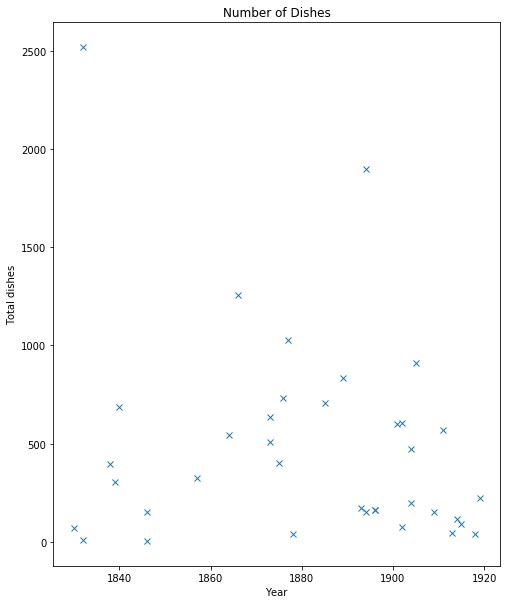

In [12]:
plt.figure(figsize=[8,10])
plt.plot(final_output['Year'], final_output['Total_dishes'],'x')
plt.title('Number of Dishes')
plt.ylabel('Total dishes')
plt.xlabel('Year')
plt.show()

This plot shows that the number of cookbooks published incerases over the time, as indicated by the denser clustering towards the right of the plot.

Over time, the number of cookbooks with more than 500 hundred dishes decreases.
From 1820 to 1890, most cookbooks have around 500 dishes. 
From 1890 to 1920, most cookbooks have around 200 dishes.

{1896: [161, 163], 1889: [836], 1846: [4, 152], 1904: [472, 196], 1875: [403], 1877: [1027], 1864: [546], 1914: [114], 1909: [151], 1873: [507, 634], 1832: [2520, 8], 1885: [708], 1840: [687], 1894: [1896, 150], 1893: [171], 1830: [71], 1839: [303], 1857: [324], 1911: [568], 1919: [225], 1866: [1257], 1918: [42], 1915: [90], 1878: [38], 1913: [43], 1876: [735], 1902: [78, 607], 1901: [599], 1905: [913], 1838: [398]}


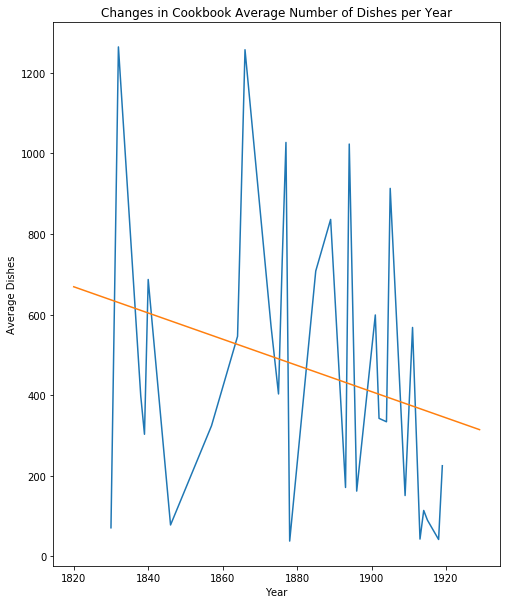

In [13]:
import statistics
Year_number={}
new_list_of_number=[]
new_list_of_year=[]

for x in range(len(final_output['Year'])):
    if final_output['Year'][x] in Year_number.keys():
        i=Year_number[final_output['Year'][x]]
        i.append(int(final_output['Total_dishes'][x]))
        Year_number[final_output['Year'][x]]=i
    else:
        Year_number[final_output['Year'][x]]=[int(final_output['Total_dishes'][x])]

print(Year_number)

for year in sorted(Year_number.keys()):
    new_list_of_number.append(statistics.mean(Year_number[year]))
    new_list_of_year.append(year)
    
plt.figure(figsize=[8,10])
plt.plot(new_list_of_year,new_list_of_number)
plt.title('Changes in Cookbook Average Number of Dishes per Year'.format(b))
plt.ylabel('Average Dishes')
plt.xlabel('Year')
model_x_values=[[x] for x in new_list_of_year]
fit = LinearRegression().fit(model_x_values, new_list_of_number)
all_positions=[x for x in range(1820,1930)]
predicted_times = fit.predict([[x] for x in all_positions])
plt.plot(all_positions,predicted_times)
plt.show()

# In this part, I may solve this problem (sort all information by year) in a complex way
# I create a dictionary (listed below)
# then I create two lists. one for x-axies and one for y-axies

From the above graph, we can see that although some cookbooks contain far more recipes than others, overall it appears that the number of recipes per cookbook has a decreasing trend over time. There are possibilities as to how this can be interpreted.

1. The first is that it is actually the case that average number of recipes per cookbook has decreased over time. An initial hypothesis to explain this is that cookbooks became more specialized over time, focusing only on dishes of a particular type or for a particular setting. However, we cannot test that based on the exact data we used to arrive at this graph. Rather, the hypothesis would require another, broader examination of a far larger sample size to be answered with certainty. It could be a question for following research.

2. The second possibility is that our sample size is too small to be representative of the average of all cookbooks from this time period, and thus we cannot claim with certainty that it is in fact the case that the average number of recipes per cookbook decreases over time.

## For certain indegredients:

take beef as an example:

learn how the frequency of appearence of "beef" changes throughout the time


meat_data is a list of ingredents we want to investigate.

we go through each word in the instructions to see if a certain kind of meat is used in this dish. We counted the frequency of the appearance of each kind of meat. Frequency is the percentage of dishes containing that meat.

First, we make two lists. One is year and one is the frequency.

Then, we make a dictionary(as did above). The key is year. the value is a list of all frequency data. Average number is computed for each year.

In [20]:
meat_data=['beef','chicken','pork','mutton', 'lamb']
meat_frequency = {}
y={}
for meat in meat_data:
    x_year=[]
    y[meat]=[]
    meat_frequency[meat]={}
    for cookbook_name in name_data:
        appear_time = 0
        dictionary = form_dictionary(cookbook_name[0])
        for key in dictionary.keys():
            if meat in dictionary[key]:
                appear_time +=1
        #for the first series of plots
        frequency = 100*appear_time/int(dictionary['number_of_total_dishes'])
        x_year.append(cookbook_name[1])
        y[meat].append(frequency)
       

        
        #for the second series of plots:
        if cookbook_name[1] not in meat_frequency[meat].keys():
            meat_frequency[meat][cookbook_name[1]]=[frequency]
        else:
            i=meat_frequency[meat][cookbook_name[1]]
            i.append(frequency)
            meat_frequency[meat][cookbook_name[1]]=i
    print(x_year,y[meat])

print('\n\n')
print(meat_frequency)

[1896, 1889, 1846, 1904, 1896, 1875, 1877, 1904, 1864, 1914, 1909, 1873, 1832, 1885, 1840, 1894, 1894, 1893, 1830, 1839, 1857, 1911, 1919, 1866, 1918, 1846, 1915, 1878, 1913, 1876, 1873, 1902, 1902, 1901, 1832, 1905, 1838] [19.875776397515526, 3.110047846889952, 50.0, 1.271186440677966, 6.748466257668712, 3.225806451612903, 5.55014605647517, 10.204081632653061, 1.8315018315018314, 4.385964912280702, 0.6622516556291391, 3.5502958579881656, 8.015873015873016, 6.779661016949152, 8.296943231441048, 12.078059071729959, 6.0, 2.3391812865497075, 8.450704225352112, 10.231023102310232, 5.246913580246914, 3.8732394366197185, 11.555555555555555, 6.364359586316627, 2.380952380952381, 10.526315789473685, 10.0, 0.0, 6.976744186046512, 9.387755102040817, 2.996845425867508, 17.94871794871795, 5.107084019769357, 4.340567612687813, 0.0, 4.928806133625411, 6.78391959798995]
[1896, 1889, 1846, 1904, 1896, 1875, 1877, 1904, 1864, 1914, 1909, 1873, 1832, 1885, 1840, 1894, 1894, 1893, 1830, 1839, 1857, 1911,

## visualization

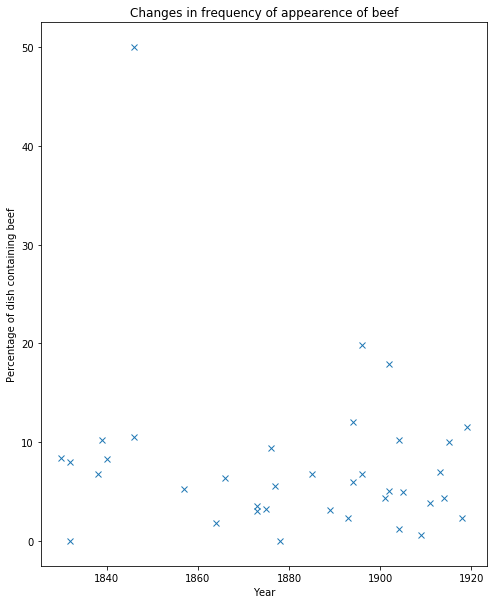

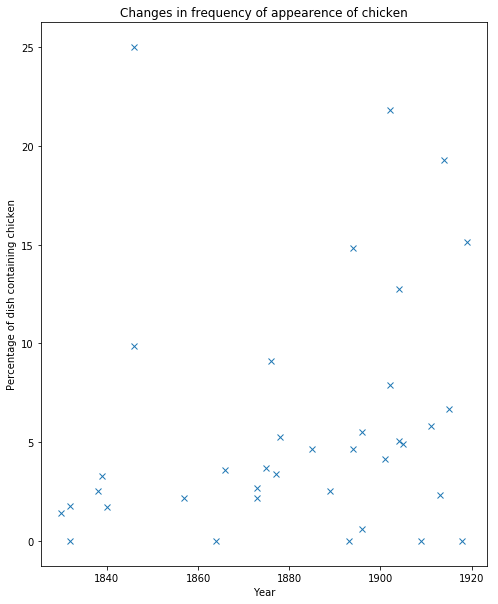

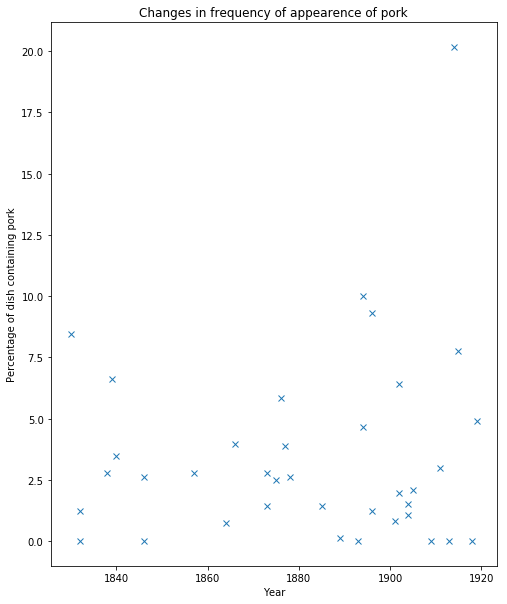

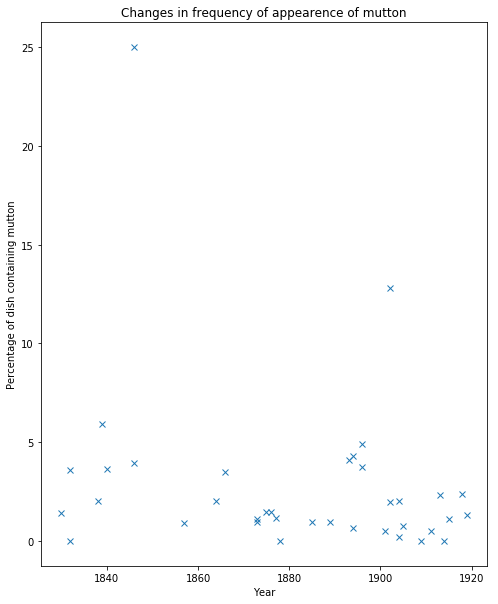

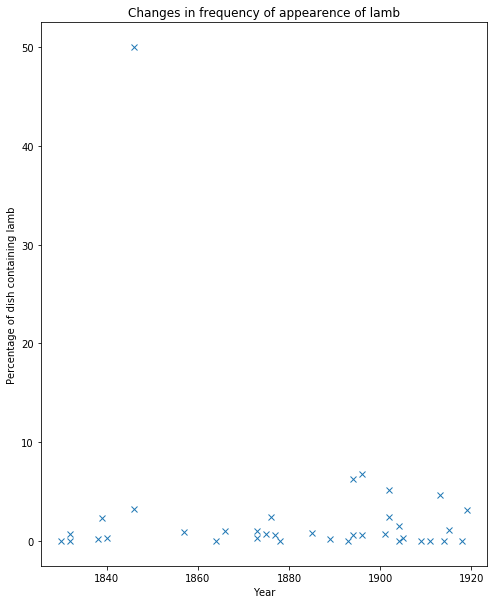

In [21]:
for meat in meat_data:
    plt.figure(figsize=[8,10])
    plt.plot(x_year,y[meat],'x')
    plt.title('Changes in frequency of appearence of {}'.format(meat))
    plt.ylabel('Percentage of dish containing {}'.format(meat))
    plt.xlabel('Year')
    plt.show()

Now we can see the frequency of the apparence of different ingredients in different years. Let's make the change throught the years more clear

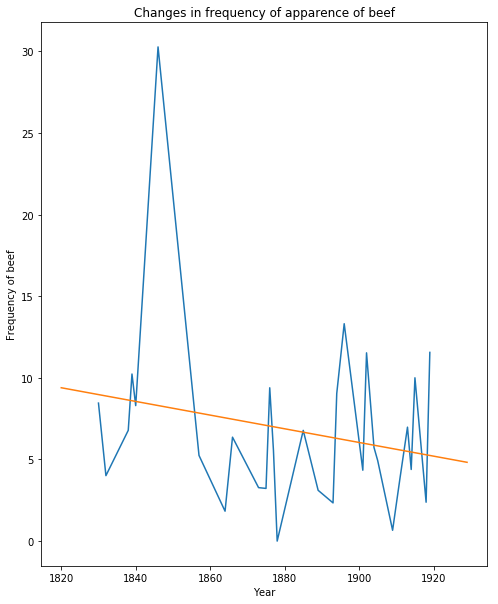

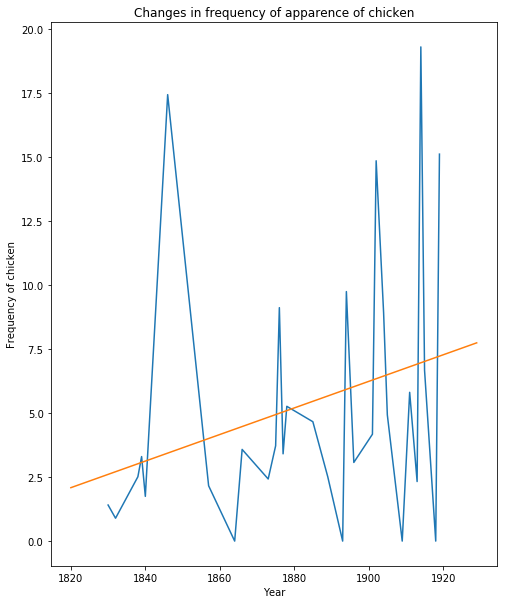

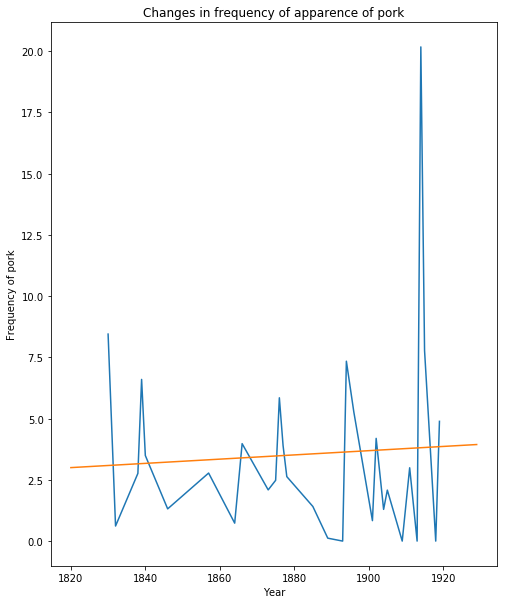

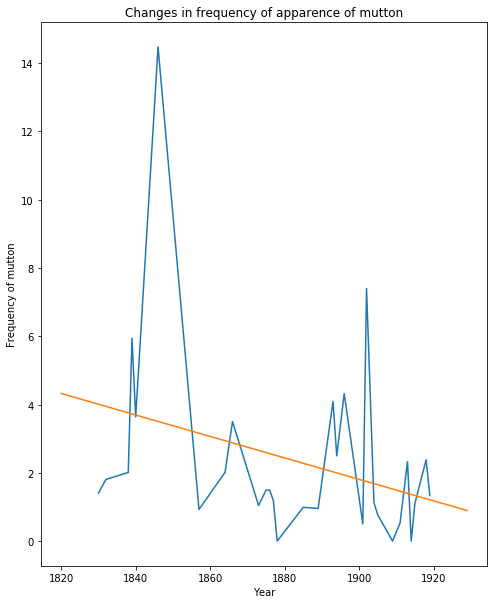

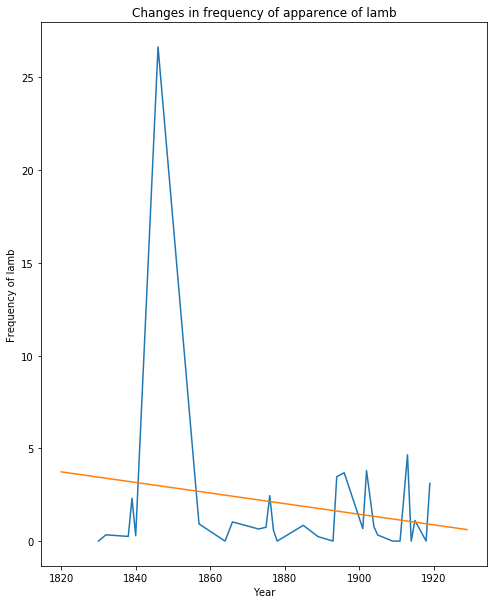

In [22]:
for meat in meat_data:
    x=[]
    y=[]
    for year in sorted(meat_frequency[meat].keys()):
        y.append(statistics.mean(meat_frequency[meat][year]))
        x.append(year)

    plt.figure(figsize=[8,10])
    plt.plot(x,y)
    plt.title('Changes in frequency of apparence of {}'.format(meat))
    plt.ylabel('Frequency of {}'.format(meat))
    plt.xlabel('Year')
    model_x_values=[[q] for q in x]
    fit = LinearRegression().fit(model_x_values, y)
    all_positions=[q for q in range(1820,1930)]
    predicted_times = fit.predict([[q] for q in all_positions])
    plt.plot(all_positions,predicted_times)
    plt.show()

* If we exclude the outlier cookbook in which 50% of the dishes contain beef, the trendline for beef will stay stable or slightly decrease throughout the time.

* There are more and more dishes with chicken. Around 1900, the percentage of chicken increases a lot. This may be related to the industrialization of farming, though it would be a subject for a different study.

* The number of recipes calling for pork has stayed approximately steady over time, excluding the one cookbook which contains about 8 times more recipes calling for pork than all of the other cookbooks.

* The number of recipes including mutton and lamb have decreased over time. Another study could be conducted in order to ascertain the reasons why.


The following graph displays the frequency that 

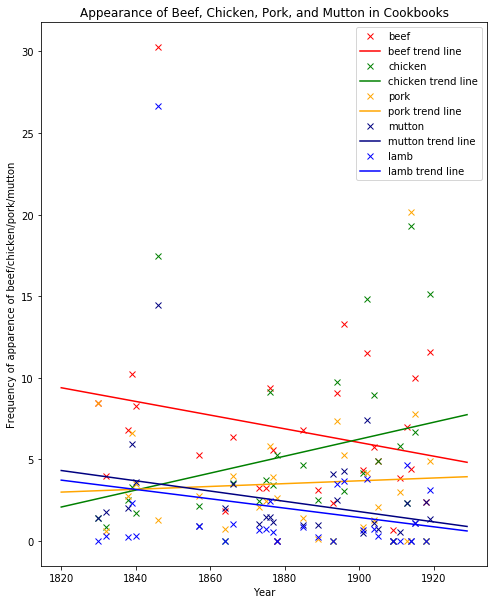

In [23]:
plt.figure(figsize=[8,10])
colour_data = ['red','green','orange','navy', 'blue']
colour_count= 0
for meat in meat_data:
    x = []
    y = []
    
    for year in sorted(meat_frequency[meat].keys()):
        y.append(statistics.mean(meat_frequency[meat][year]))
        x.append(year)
    
    plt.plot(x, y, 'x', color=colour_data[colour_count], label=meat)
    model_x_values = [[q] for q in x]
    fit = LinearRegression().fit(model_x_values, y)
    all_positions = [q for q in range(1820,1930)]
    predicted_times = fit.predict([[q] for q in all_positions])
    plt.plot(all_positions, predicted_times, color=colour_data[colour_count], label=meat+' trend line')
    colour_count += 1
    
    
plt.title('Appearance of Beef, Chicken, Pork, and Mutton in Cookbooks')
plt.ylabel('Frequency of apparence of beef/chicken/pork/mutton')
plt.xlabel('Year')
plt.legend(loc = 'upper right')
plt.show()

The above graph compares how often beef, chicken, pork, mutton and lamb were used as ingredients in recipes from cookbooks of different years. 

* It appears that between 1820 and 1920 the use of beef, mutton and lamb declined, while the use of chicken and pork increased. It would be interesting to see follow-up studies on why this is the case.
* It is interesting to note how chicken started out as the least common, yet has become the most common. This trend aligns with observations from my everyday life; I often see chicken as the main component in meals. In contrast, I rarely see mutton or lamb served anywhere.


### Limitations of This Study:

Our data set is limited. 
* We started with the Historic American Cookbook Dataset, which contains American cookbooks from the late 18th through early 20th century. 
* Then, we manually went through the 76 cookbooks and picked out the 37 which listed recipes in a form that we could work with.
* Our data set is limited to representing 37/76, or 49%, of the Historic American Cookbook Dataset.

Our output may not be very accurate.
* When finding dishes our code may have counted things which are not dishes as though they were.
* We may also have missed including some dishes because they were not in all capital letters.
* When counting ingredients, we only included salt, sugar, oil, and pepper. 
* Furthermore, the default measures which we set for the ingredients could be very inaccurate. 
    * We tried to use default measures that could be common. 
    * However, most of them are very small, and we did not take into account whether a recipe was supposed to cook enough for one or several people. 
    * Recipes for several people would include much larger ingredient measurements than those to serve one person.

Separation between our data and reality.
* Based on cookbooks alone, we cannot determine how well the cookbooks represent the way people were actually cooking.
* Having no data outside the cookbooks themselves, not even knowing how many of each cookbook was sold, we cannot responsibly draw any conclusions about American cooking habits.
* For example, one person might have used every recipe in a cookbook within one year, while another person could have only used one particular recipe from a cookbook on a weekly basis.
* We simply have no way of knowing, and it would require a study with different datasets to answer those questions.

Our data represents a very small sample size, and a more comprehensive study would be needed to confirm or correct our findings.

### Conclusions:

* Over time there has been a decrease in the number of dishes per cookbook, which could indicate specialization in the purpose of a cookbook. For example, people may have different cookbooks for dessert, main dishes, and special occasions. This would mean that each cookbook did not need to contain as many recipes, and that people would have multiple cookbooks.
* It appears that Americans consume more sugar than salt, oil, and pepper. 
* The frequency of the appearance of sugar and oil decreases throught the years, and that of salt and pepper increases.
* Among chicken, beef, pork, mutton and lamb, chicken is the most popular meat in the US and mutton is the least popular. Chicken increases from 1820 to 1920; pork stays the same; beef, mutton and lamb decrease.

### Questions for Further Study:

* Have cookbooks become more specialized over time?
* Have the number of recipes per cookbook decreased on average over time?
* Will the same trends emerge and conclusions be reached if this study is redone with a larger dataset?
* How closely do the trends in cookbooks represent American cooking habits?
* Why has the usage of pepper increased over time?
* How have cooking methods changed over time, and how has that affected which ingredients are used?
* Why has usage of chicken increased so much over time?
* Why have mutton and lamb decreased over time, and why were they less common to begin with?
* Do people often use cookbooks?